In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ORCL.csv')

In [2]:
open_price = df['Open'].values
close_price = df['Close'].values

In [3]:
df.head()

,Date,Year,Month,Day,Weekday,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,last digit
0,2014-01-02,2014,1,2,Thursday,37.78,38.03,37.55,37.84,18162100.0,35.03,0.000000,35.0300,35.0300,8
1,2014-01-03,2014,1,3,Friday,37.65,37.86,37.56,37.62,11693900.0,34.93,-0.002651,34.9800,34.9800,5
2,2014-01-06,2014,1,6,Monday,37.64,37.80,37.42,37.47,15329400.0,34.80,-0.003987,34.9200,34.9200,4
3,2014-01-07,2014,1,7,Tuesday,37.66,37.93,37.50,37.85,16792200.0,35.15,0.010141,34.9775,34.9775,6
4,2014-01-08,2014,1,8,Wednesday,37.79,37.91,37.56,37.72,16111600.0,35.03,-0.003434,34.9880,34.9880,9


In [4]:
def dailyTradeStrategy(df, R = False):
    profit_arr = np.array([])
    overnight_arr = np.array([])
    for i in range(open_price.size):
        if i == 0:
            continue

        overnight = (open_price[i] - close_price[i-1]) / close_price[i-1] * 100
        
        if overnight:
            overnight_arr = np.append(overnight_arr, overnight)

            if overnight > R: 
                shares = 100 / open_price[i]
                profit = (close_price[i] - open_price[i] ) * shares
            elif overnight < R:
                shares = 100 / close_price[i]
                profit = (open_price[i] - close_price[i]) * shares

            profit_arr = np.append(profit_arr, profit)
    return profit_arr, overnight_arr

In [5]:
R = range(-5, 6)
ave_profit_arr = []
for r in R:
    profit, overnight = dailyTradeStrategy(df, r)
    ave_profit_arr.append(np.mean(profit))

Text(0,0.5,'Average profit')

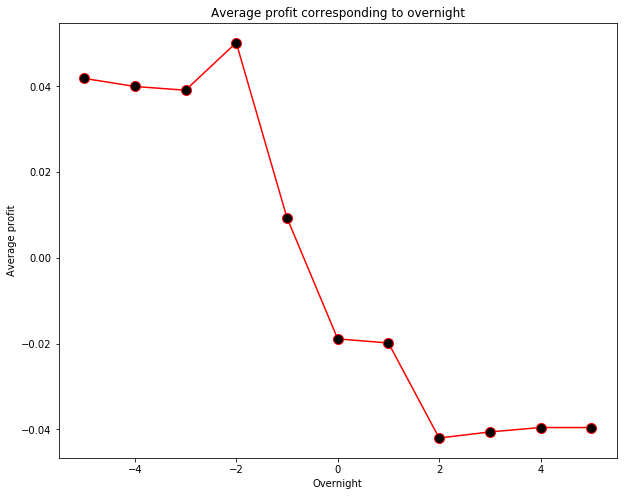

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(R, ave_profit_arr , color='red',
            marker='o', markerfacecolor='black', markersize=10) 
plt.title('Average profit corresponding to overnight')
plt.xlabel('Overnight')
plt.ylabel('Average profit')